# Table Of Contents:

### Objective Of The Project
- A Portuguese Banking Institution needs to understand which of their existing customers are most likely to invest in a term deposit. They launched a tele-marketing campaign to run an experiment on approximately 41000 customers and analyse the differences between the ones who do opt for a TD and the ones who do not.

### What is the need of this analysis?
- If with the use of data visualisation and statistical analysis, it can be comprehensively confirmed, how the customers who agrees to procure a TD is different from the customers who do not, the organization can further use these discovered differences to establish the profile of their potential customers and focus more on the customers that closely resemble the profile of the potential customers to the business.
- So, By performing the exploratory data analysis on this bank marketing dataset the aim is to gather patterns and insights that can help the bank to attract more customers for its 'term deposit' campaign which in tern will help to grow the business.
- positive class = customers who agree to procure a TD (y = yes)
- negative class = customers who agree to procure a TD (y = no)

### What is explored?
- Performed data-driven analysis to discover the profile of customers who are most likely to buy the Term Deposit. The profile is discovered by investigating the data points available using different analysis lile - take one feature at a time i.e. univariate analysis, also with multiple data points visualized together i.e bi-variate analysis.

### Technical Aspect
The project is divided into major 6 parts:
- Data Quality Check or inspection of the data.
- Descriptive statitics or summary statistics.
- Exploratory Data Analysis.
- Data Pre-processing.
- Model Building.
- Model Evaluation.
- Conclusion.

### About the dataset: Feature information:
##### bank client data:
- age (numeric)
- job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
- marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
- education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
- default: has credit in default? (categorical: 'no','yes','unknown')
- housing: has housing loan? (categorical: 'no','yes','unknown')
- loan: has personal loan? (categorical: 'no','yes','unknown')

##### data related with the last contact of the current campaign:
- contact: contact communication type (categorical: 'cellular','telephone')
- month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
- day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
- duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

##### Other features:
- campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
- previous: number of contacts performed before this campaign and for this client (numeric)
- poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

##### social and economic context attributes
- emp.var.rate: employment variation rate - quarterly indicator (numeric)
- cons.price.idx: consumer price index - monthly indicator (numeric)
- cons.conf.idx: consumer confidence index - monthly indicator (numeric)
- euribor3m: euribor 3 month rate - daily indicator (numeric)
- nr.employed: number of employees - quarterly indicator (numeric)


### Challenges Faced
- Data cleaning
- High number of features
- Handling multi labelled categorical columns

### Conclusion

### Import all the necessary packages:

In [33]:
# import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
#Load the dataset
df = pd.read_csv(r'C:\Users\91842\Downloads\bank-dataset.csv')

#check the firt 5 rows:
df.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [35]:
df.shape

(41188, 20)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   housing         41188 non-null  object 
 5   loan            41188 non-null  object 
 6   contact         41188 non-null  object 
 7   month           41188 non-null  object 
 8   day_of_week     41188 non-null  object 
 9   duration        41188 non-null  int64  
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  object 
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

- Insights:
Out of total 21 columns there are total 11 categorical columns and the rest are numerical columns.

In [37]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Insights:
- No null values in the data

In [38]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Insights:
- The avg age of the sample customers is approx 40 year. 
- But there is customer with age 98 also present which seems an outlier in this case as the campaign is for term deposit and the target age , i.e 98. 
- It seems very unlikely to take a term deposit at this age. Hence, We need to look at the age column. 
- The column duration has a high std, which indicates the spread in the data. 75% of the contact duration is less than 319 sec. 
- And there are some calls where the contact duration is more than 319 sec. So with respect to duration we can check the outcome of that call.
- For the column 'pdays' statistics(value=999) it seems that most of the customers were not previously contacted.

Data cleaning:
- There are special characters present in columns 'education', 'job', need to handle those in order to make the data clean.

In [39]:
#clean the eductaion column values:
df['education'] = df['education'].str.replace('.', ' ')

In [40]:
df['education'].value_counts()

university degree      13899
high school             9515
basic 9y                6045
professional course     5243
basic 4y                4176
basic 6y                2292
illiterate                18
Name: education, dtype: int64

In [41]:
#clean the job column values:
print('Before cleaning\n', df['job'].value_counts())

Before cleaning
 admin.           10752
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
Name: job, dtype: int64


In [42]:
#clean the job column values
df['job'] = df['job'].str.replace('.', ' ')
print('After cleaning\n', df['job'].value_counts())

After cleaning
 admin            10752
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
Name: job, dtype: int64


### EDA: Ask the questions first
##### Before starting with the EDA, here are the few questions that needs to be explored using the features present in this dataset.

1. Customers who responded positive what age category they belog to, similarly who did not responoded what is their representative age value?
2. Find out the Marital status of the customers who responnde postive?
3. Find out if positive responses belog to any specific job profile customers or not?
4. Do people with personal lona and housing loan are opting for TD or becuase of an existing loan they are not opting for TD?
5. What is the education background of the customers who are opting for TD? Can I generalize their education background?
6. Customers who are responding positive what communication way was taken to contact them? Does the communication way have an impact on the response of the customers? Which one is the most impactful communication way?
7. Customers who are responding positive what is their duraction of the communication? Does duration has impact on the response?  If yes, then what is the avg contact time with such customers and what is the avg contact duration with the other class customers?

#### Check the proportion of the customers who responond positive to the campaign and who did not: Differentiate the segment first based on the response column
- Seggregate these 2 category customers. 
- Perform analysis separately on them to get insights how their patterns differ.
- Then we will utilize those found differentiable patterns to identify potential customers which are likely to benefit the business (positive response customers).

<AxesSubplot:ylabel='y'>

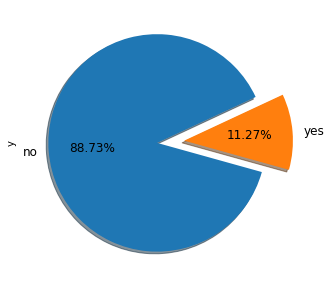

In [43]:
plt.figure(figsize=(5,5))
df.y.value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', shadow=True, fontsize=12, startangle=25)

Insights
- Out of total contacted customers only 11.27% responded positive and rest did not.

- Now let us look separately into these 2 category customers and their statistics:

Insights:
- It seems the contact duration is higher for customers who opted for TD. 50% of the call duration is more than 449 seconds.
- Whereas, for customers who did not opted for TD the 70% of the call duration is less than 279 seconds only.
- So customer's interest in TD is clear from the duration of the contact.

#### Univarite analysis:

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 5))
sns.distplot(df.duration, ax=ax1)
sns.boxplot(x = 'duration', data = df, orient = None, ax = ax2)

Insights:
- contact duration has right skewness in the data which shows that there are some calls where the communication was more that the avg duration of the communication.
- For such high duration contacs we need to check the respective respond.
- And below the avg duration what is the respond.

Check the distribution of age:

In [ ]:
sns.distplot(df.age)

Insights:
- age is not normally distributed across the data. Customers of age above 80 were also contacted as part of this campaign.
- But taking new finncial decision (like opening a new TD account etc) at this high age is rare. 
- 80 years or older may not exactly represent accurately data points distribution here
- Furthermore, there is a threshold at which children (below 18) too young to be replying to the campaign.
- Hence we need to handle both those values. 

Let's explore the outcome of the previous marketing campaign column 'poutcome':

In [ ]:
#plot the pie chart of potcome categories
#(df.poutcome.value_counts() * 100 / len(df)).plot.pie()
#plt.show()
plt.figure(figsize=(5,5))
(df.poutcome.value_counts() * 100 / len(df)).plot.pie(autopct='%1.2f%%', shadow=True)

Insights:
- From the previous campaign outcome's data it seems we have big portion from nonexistin data. 
- Which do not contribute much in this analysis.
- Only 3.33% of the responses were positive last time and 10.32% were failure.

#### Bivariate analysis:
- marital status vs who opted for TD

In [ ]:
#calculate the percentage of each marital status category 
(df.marital.value_counts() * 100 / len(df)).round(decimals = 2)

In [ ]:
#how marital status vs TD is looking together:
df.groupby(['marital','y']).agg({'y':'count'})

In [ ]:
sns.countplot(opted_TD['marital']);

Insights:
- We can say that mostly married and single people are opting for the TD. Divorced people are opting less in comaprsion to these 2 categories.   

In [ ]:
plt.figure(figsize=(4,4));
sns.countplot(x=df['marital'], hue=df['y']);
plt.show()

job profile of the customers who opted for TD:
- What job profile customers are likely to respond to the campaign:

In [ ]:
#calculate the percentage of each job status category.
(df.job.value_counts() *100 / len(df)).round(decimals = 2)

In [ ]:
plt.figure(figsize=(14,8));
sns.countplot(x=opted_TD['job']);
plt.show()

Insights:
- So, we can see that among all the job profiles admin, technician, blue-collar and retired persons are likely to opt for TD. 

Personal Loan vs TD : 
- Lets explore if poepole who do not have any loan are respoding to the campaign or not 

In [ ]:
df.groupby(['loan','y']).agg({'y':'count'})

In [ ]:
plt.figure(figsize=(4,4));
sns.countplot(x=df['loan'], hue=df['y']);
plt.show()

Insights:
- It is clear that people who donot have persoanl loan are likely to opt for the TD 
- There are few people with loan who also have opted for the TD but they are less in numbers wrt the 1st category.

Housing loan vs TD:

In [ ]:
plt.figure(figsize=(4,4));
sns.countplot(x=df['housing'], hue=df['y']);
plt.show()

Insights:
- There is not much difference between the responses of customers with housing loan or without housing loan. 
- It is not a very goof differentiating feature as the proportions are almost similar.

education vs response:
- Lets explore if there is any pattern existing in between eduction and response

In [ ]:
plt.figure(figsize=(12,6));
sns.countplot(x=df['education'], hue=df['y']);
plt.show()

- From the graph it shows that students with education background like 'high school' and 'university degree' are most likely to opt for the TD.

Analyse the variables which are related with the last contact of the current campaign:
- contact: contact communication type 
- month: last contact month of year
- day_of_week: last contact day of the week

Plotting Time variables and their distributions:
- month, day_of_week, contact

In [ ]:
print(df.day_of_week.unique())
print(df.month.unique())
print(len(df.month.unique()))

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (18, 5))
sns.countplot("month", data=df, ax=ax1, order = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
sns.countplot("day_of_week", data=df, ax=ax2, order=['mon', 'tue', 'wed', 'thu', 'fri'])
sns.countplot("contact", data = df, ax=ax3)

Insights:
- On year-end and financial year-end (Dec, Mar) the customer contacts are the least.
- Customer contact across week is normal

Contact vs Response:
- Type of communication can impact the response of the customers

In [ ]:
plt.figure(figsize=(4,4));
sns.countplot(x=df['contact'], hue=df['y']);
plt.show()

In [ ]:
Insights:
- Contacing through cell phones are the effective way than contacting through telephone/land-line.
- An effective communication way can impact the efficient baniking processes. Hence this can be a good differentiating factor.

In [ ]:
(opted_TD['contact'].value_counts()/opted_TD['contact'].shape[0])*100

- So for positive responses almost 83% of those customers were contatced oevr cell phone and not telephone.
- So using the contact way as ceelular would be more beneficial here.

In [ ]:
df.columns

Plot quatitative vs qualitative: plot avg contact duration for positive response and negative response

In [ ]:
df.groupby('y').agg({'duration':'mean'}).sort_values(by='duration', ascending=False)

In [ ]:
df.groupby('y').agg({'duration':'mean'}).sort_values(by='duration', ascending=False).plot(kind='bar');

Insights:
- It seems for positive responses the avg contact duration was higher than the negative response contact duration.